In [365]:
from pykat import finesse        
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy       
from IPython.display import Image              


%matplotlib inline               

pykat.init_pykat_plotting(dpi=90)

In [366]:

basecode = """

#10 watt input laser
l laser 10 0 n0

#phase modulator @7MHz
s smod 1 n0 n1
mod eom 7e6 0.5 1 pm n1 n2  
s s0 1 n2 n3

#bs to probe reflected SB
bs bs1 0.5 0.5 0 0 n3 n4 n5 n6
s s1 1 n5 n7

#power recycling mirror
m1 PRM 0.03 0 0 n7 n8

#power recycling cavity
s PRC 5 n8 n9 

#bs to probe reflected light from MI
bs bs2 0.5 0.5 0 0 n9 n10 n11 n12
s s2 0 n11 n13

#MI bs in dark fringe mode
bs bs3 0.5 0.5 45 0 n13 n14 n15 n16

#y-arm
s sy 5 n14 n17
m1 itmy 0.014 0 0 n17 n18

#x-arm
s sx 5 n15 n19
m1 itmx 0.014 0 0 n19 n20



#detectors
#pd main_out n16
ad SB_refl_bs1 7e6 n6


#graph
xaxis PRC L lin 0 40 200   
yaxis abs:deg
"""

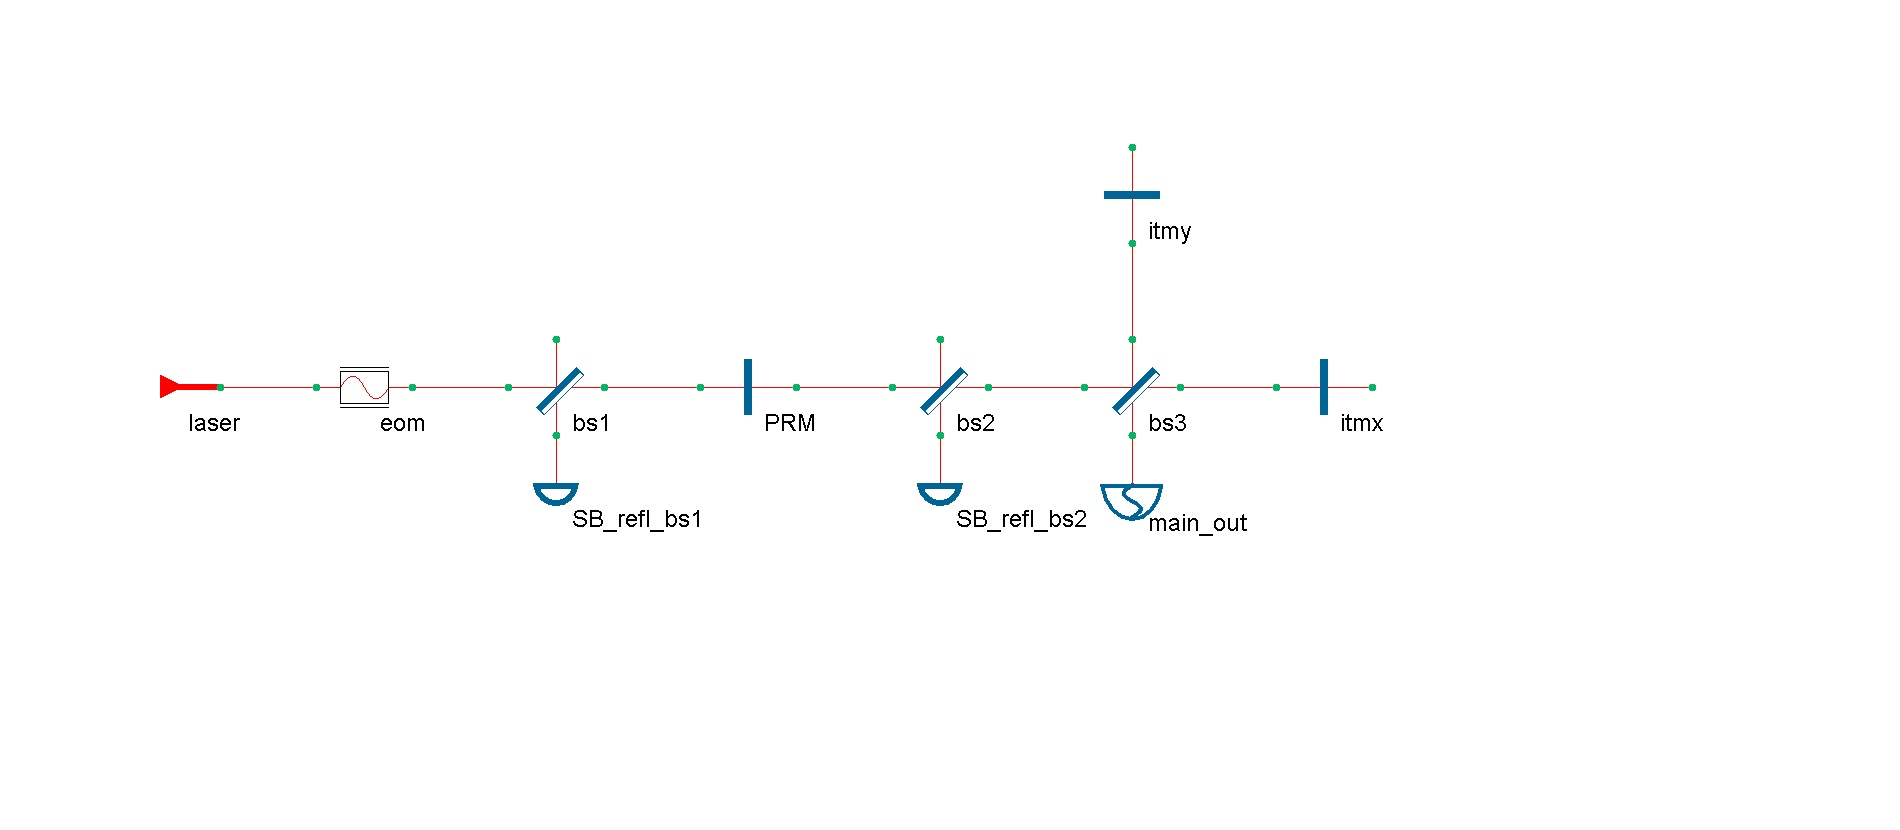

In [367]:
Image(filename='PRMI.jpg')

In [368]:

basekat = finesse.kat() 
basekat.verbose = False
basekat.parse(basecode)

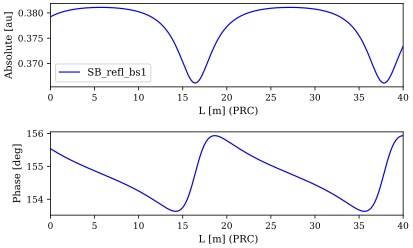

In [369]:
out1 = basekat.run()
out1.plot(['SB_refl_bs1'])
